In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("dataset_kotor.xlsx")

In [ ]:
data.head()

,id,tweetid,guid,link,author,title,description,update,source,favorite_count,...,retweeted_status_id,user_id,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,user_verified
0,1,1675889077823102976,https://twitter.com/NgopiLagiYuk/statuses/1675...,https://twitter.com/NgopiLagiYuk/statuses/1675...,NgopiLagiYuk,"RT @RizkiR4madani: Asyiapp 👍🏻👍🏻 Mudah"" Di Tera...","Asyiapp 👍🏻👍🏻 Mudah"" Di Terakomodir.. Suara Tem...",2023-07-03 11:27:47,Twitter for Android,0,...,1675737271964954625,1351556351302926339,https://pbs.twimg.com/profile_images/160402773...,2854,2782,2588,2021-01-19 10:45:34,"Masih tetep sigalak yg dulu, cuma sekarang lg ...",di pojokan hatimu,NaN
1,2,1675888100407640064,https://twitter.com/khrisma412/statuses/167588...,https://twitter.com/khrisma412/statuses/167588...,khrisma412,RT @Subur0204: Tidak perlukah Haji Ganjar VS p...,Tidak perlukah Haji Ganjar VS pak Prabowo atau...,2023-07-03 11:23:54,Twitter Web App,0,...,1675692186518839304,102333073,https://pbs.twimg.com/profile_images/162274369...,2928,778,338,2010-01-06 05:21:07,NaN,sidoarjo - jawa timur,NaN
2,3,1675883936969527296,https://twitter.com/tnmuda/statuses/1675883936...,https://twitter.com/tnmuda/statuses/1675883936...,tnmuda,RT @T4npa4ran: Setuju👍. \n@ganjarpranowo butuh...,Setuju👍. \n@ganjarpranowo butuh sosok pendampi...,2023-07-03 11:07:21,Twitter for Android,0,...,1675869271614955520,76428045,https://pbs.twimg.com/profile_images/157117950...,47265,81505,80553,2009-09-22 15:43:05,IFB and follow. DM if I missed the follow back...,NaN,NaN
3,4,1675883187552043009,https://twitter.com/AlamRah2802/statuses/16758...,https://twitter.com/AlamRah2802/statuses/16758...,AlamRah2802,RT @Subur0204: Tidak perlukah Haji Ganjar VS p...,Tidak perlukah Haji Ganjar VS pak Prabowo atau...,2023-07-03 11:04:22,Twitter for Android,0,...,1675692186518839304,1606329050322112513,https://pbs.twimg.com/profile_images/160632925...,68,25,5,2022-12-23 11:41:51,NaN,NaN,NaN
4,5,1675883101636169733,https://twitter.com/wil_ws_/statuses/167588310...,https://twitter.com/wil_ws_/statuses/167588310...,wil_ws_,RT @T4npa4ran: Setuju👍. \n@ganjarpranowo butuh...,Setuju👍. \n@ganjarpranowo butuh sosok pendampi...,2023-07-03 11:04:02,Twitter for iPhone,0,...,1675869271614955520,87632140,https://pbs.twimg.com/profile_images/166956364...,245022,8329,8283,2009-11-05 01:42:41,NaN,Indonesia,NaN


In [ ]:
#Get info from the dataframe
variables = []
dtypes = []
count = []
unique = []
missing = []

for item in data.columns:
    variables.append(item)
    dtypes.append(data[item].dtype)
    count.append(len(data[item]))
    unique.append(len(data[item].unique()))
    missing.append(data[item].isna().sum())

output = pd.DataFrame({
    'variable': variables,
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing,

})

output

,variable,dtype,count,unique,missing
0,id,int64,1640,1640,0
1,tweetid,int64,1640,1640,0
2,guid,object,1640,1640,0
3,link,object,1640,1640,0
4,author,object,1640,812,0
5,title,object,1640,435,0
6,description,object,1640,323,0
7,update,object,1640,1635,0
8,source,object,1640,11,0
9,favorite_count,int64,1640,41,0


In [ ]:
# Bagi dataset menjadi fitur (X) dan target (y)
df={
    "from" : data["author"],
    "target" : data["retweeted_screen_name"]
}

df = pd.DataFrame(df)

In [ ]:
df.head()

,from,target
0,NgopiLagiYuk,RizkiR4madani
1,khrisma412,Subur0204
2,tnmuda,T4npa4ran
3,AlamRah2802,Subur0204
4,wil_ws_,T4npa4ran


In [ ]:
df.to_excel("dataset_edge.xlsx", index = False)

In [ ]:
df = pd.read_excel("dataset_edge.xlsx")

In [ ]:
df.head()

,from,target
0,NgopiLagiYuk,RizkiR4madani
1,khrisma412,Subur0204
2,tnmuda,T4npa4ran
3,AlamRah2802,Subur0204
4,wil_ws_,T4npa4ran


In [ ]:
df.tail()

,from,target
1635,Prah76142776,DoankWarto
1636,rohmadhidayat82,NaN
1637,nalar_logis,NaN
1638,al_lasan,03__nakula
1639,al_lasan,03__nakula


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   from    1640 non-null   object
 1   target  1318 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [ ]:
df.isna().sum()

from        0
target    322
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

from      0
target    0
dtype: int64

In [ ]:
df.head()

,from,target
0,NgopiLagiYuk,RizkiR4madani
1,khrisma412,Subur0204
2,tnmuda,T4npa4ran
3,AlamRah2802,Subur0204
4,wil_ws_,T4npa4ran


In [ ]:
df.tail()

,from,target
1633,TopToross,nalar_logis
1634,chaterine_8,Baba97Alie
1635,Prah76142776,DoankWarto
1638,al_lasan,03__nakula
1639,al_lasan,03__nakula


#Degree Centality

In [ ]:
import networkx as nx
from networkx.algorithms.bipartite.centrality import degree_centrality

G = nx.DiGraph()
G = nx.from_pandas_edgelist(df, source='from', target='target')

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort the degree centrality dictionary by values in descending order
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 nodes with the highest degree centrality
top_5_nodes = sorted_degree_centrality[:5]

print("Top 5 nodes with the highest degree centrality:")
for node, centrality in top_5_nodes:
    print(f"Node: {node}, Degree Centrality: {centrality}")

Top 5 nodes with the highest degree centrality:
Node: Subur0204, Degree Centrality: 0.2180232558139535
Node: ch_chotimah2, Degree Centrality: 0.21075581395348836
Node: ex_AnakLolina, Degree Centrality: 0.08866279069767442
Node: seruanhl, Degree Centrality: 0.08139534883720931
Node: PartaiSocmed, Degree Centrality: 0.0755813953488372


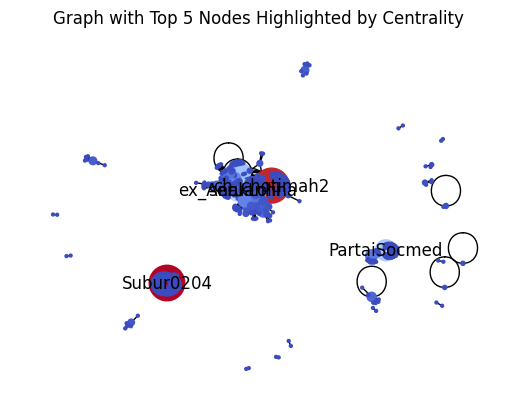

In [ ]:
# Get the top 5 nodes with the highest degree centrality
top_5_nodes = sorted_degree_centrality[:5]

# Define node colors based on centrality
node_colors = [degree_centrality[node] for node in G.nodes()]

# Define node sizes based on centrality
node_sizes = [3000 * degree_centrality[node] for node in G.nodes()]

# Draw the graph with customized node attributes
pos = nx.spring_layout(G)  # Define the layout of the graph
nx.draw_networkx(G, pos, with_labels=False, node_color=node_colors, cmap='coolwarm', node_size=node_sizes)

# Draw labels for the top 5 nodes
nx.draw_networkx_labels(G, pos, labels={node: node for node, _ in top_5_nodes}, font_size=12, font_color='black')

plt.title("Graph with Top 5 Nodes Highlighted by Centrality")
plt.axis("off")
plt.show()


#Betweeness Centrality

In [ ]:
# Calculate betweenness centrality
betweennes_centrality = nx.betweenness_centrality(G)

# Sort the betweenness centrality dictionary by values in descending order
sorted_betweennes_centrality = sorted(betweennes_centrality.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 nodes with the highest betweenness centrality
top_5_nodes = sorted_betweennes_centrality[:5]

print("Top 5 nodes with the highest betweennes centrality:")
for node, centrality in top_5_nodes:
    print(f"Node: {node}, betweennes Centrality: {centrality}")

Top 5 nodes with the highest betweennes centrality:
Node: ch_chotimah2, betweennes Centrality: 0.17743338177493476
Node: seruanhl, betweennes Centrality: 0.07636505899786875
Node: ex_AnakLolina, betweennes Centrality: 0.07444660214742227
Node: FirzaHusainID, betweennes Centrality: 0.057327568697178685
Node: siticeriaselalu, betweennes Centrality: 0.05021632887835027


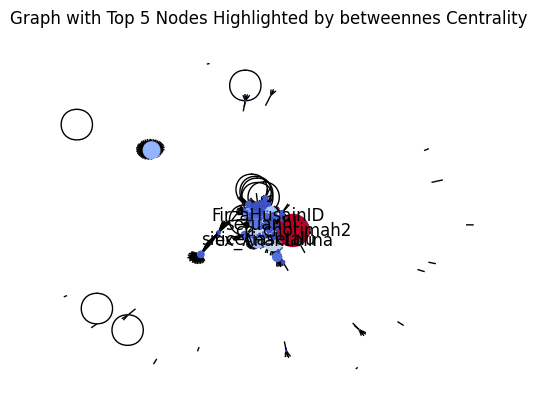

In [ ]:
# Get the top 5 nodes with the highest betweenness centrality
top_5_nodes = sorted_betweennes_centrality[:5]

# Define node colors based on betweenness centrality
node_colors = [betweennes_centrality[node] for node in G.nodes()]

# Define node sizes based on betweenness centrality
node_sizes = [3000 * betweennes_centrality[node] for node in G.nodes()]

# Draw the graph with customized node attributes
pos = nx.spring_layout(G)  # Define the layout of the graph
nx.draw_networkx(G, pos, with_labels=False, node_color=node_colors, cmap='coolwarm', node_size=node_sizes)

# Draw labels for the top 5 nodes betweenness centrality
nx.draw_networkx_labels(G, pos, labels={node: node for node, _ in top_5_nodes}, font_size=12, font_color='black')

plt.title("Graph with Top 5 Nodes Highlighted by betweennes Centrality")
plt.axis("off")
plt.show()

#Closeness Centrality

In [ ]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Sort the degree centrality dictionary by values in descending order
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 nodes with the highest degree centrality
top_5_nodes = sorted_closeness_centrality[:5]

print("Top 5 nodes with the highest closeness centrality:")
for node, centrality in top_5_nodes:
    print(f"Node: {node}, closeness Centrality: {centrality}")

Top 5 nodes with the highest closeness centrality:
Node: ch_chotimah2, closeness Centrality: 0.28333720930232553
Node: ex_AnakLolina, closeness Centrality: 0.270359932540387
Node: FirzaHusainID, closeness Centrality: 0.26831175123326284
Node: seruanhl, closeness Centrality: 0.26487185698668253
Node: mudha_satriya, closeness Centrality: 0.24619668136994527


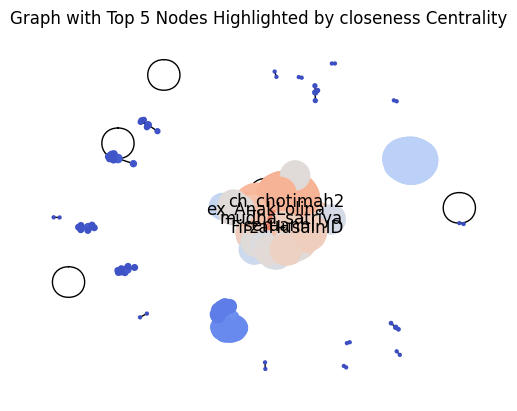

In [ ]:
# Get the top 5 nodes with the highest closeness centrality
top_5_nodes = sorted_closeness_centrality[:5]

# Define node colors based on closeness centrality
node_colors = [closeness_centrality[node] for node in G.nodes()]

# Define node sizes based on closeness centrality
node_sizes = [3000 * closeness_centrality[node] for node in G.nodes()]

# Draw the graph with customized node attributes
pos = nx.spring_layout(G)  # Define the layout of the graph
nx.draw_networkx(G, pos, with_labels=False, node_color=node_colors, cmap='coolwarm', node_size=node_sizes)

# Draw labels for the top 5 nodes
nx.draw_networkx_labels(G, pos, labels={node: node for node, _ in top_5_nodes}, font_size=12, font_color='black')

plt.title("Graph with Top 5 Nodes Highlighted by closeness Centrality")
plt.axis("off")
plt.show()

#Eigenvector Centrality


In [ ]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sort the eigenvector centrality dictionary by values in descending order
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 nodes with the highest eigenvector centrality
top_5_nodes = sorted_eigenvector_centrality[:5]

print("Top 5 nodes with the highest eigenvector centrality:")
for node, centrality in top_5_nodes:
    print(f"Node: {node}, eigenvector Centrality: {centrality}")

Top 5 nodes with the highest eigenvector centrality:
Node: ch_chotimah2, eigenvector Centrality: 0.3652559822245714
Node: seruanhl, eigenvector Centrality: 0.26413855172422
Node: Nini_Cupid, eigenvector Centrality: 0.25636093139470306
Node: Mira_SasMiita, eigenvector Centrality: 0.23798265365802623
Node: FirzaHusainID, eigenvector Centrality: 0.2275220142694043


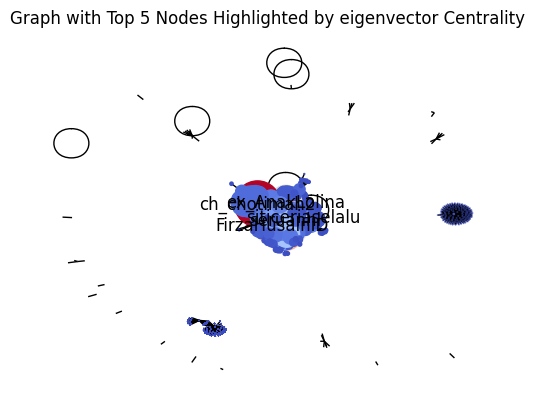

In [ ]:
# Get the top 5 nodes with the highest eigenvector centrality
top_5_nodes = sorted_betweennes_centrality[:5]

# Define node colors based on centrality
node_colors = [eigenvector_centrality[node] for node in G.nodes()]

# Define node sizes based on centrality
node_sizes = [3000 * eigenvector_centrality[node] for node in G.nodes()]

# Draw the graph with customized node attributes
pos = nx.spring_layout(G)  # Define the layout of the graph
nx.draw_networkx(G, pos, with_labels=False, node_color=node_colors, cmap='coolwarm', node_size=node_sizes)

# Draw labels for the top 5 nodes
nx.draw_networkx_labels(G, pos, labels={node: node for node, _ in top_5_nodes}, font_size=12, font_color='black')

plt.title("Graph with Top 5 Nodes Highlighted by eigenvector Centrality")
plt.axis("off")
plt.show()

#Page Rank

In [ ]:
# Calculate pagerank centrality
pagerank_centrality = nx.pagerank(G, alpha =0.85)

# Sort the pagerank centrality dictionary by values in descending order
sorted_pagerank_centrality = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 nodes with the highest pagerank centrality
top_5_nodes = sorted_pagerank_centrality[:5]

print("Top 5 nodes with the highest pagerank centrality:")
for node, centrality in top_5_nodes:
    print(f"Node: {node}, pagerank Centrality: {centrality}")

Top 5 nodes with the highest pagerank centrality:
Node: Subur0204, pagerank Centrality: 0.10070414034244014
Node: ch_chotimah2, pagerank Centrality: 0.06999878471988659
Node: PartaiSocmed, pagerank Centrality: 0.032249762284081995
Node: ex_AnakLolina, pagerank Centrality: 0.024938416518320856
Node: siticeriaselalu, pagerank Centrality: 0.019194791585298857


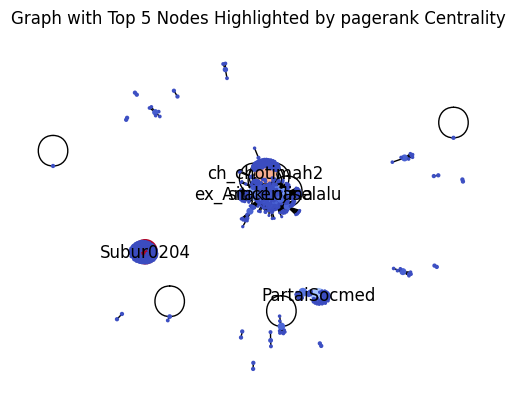

In [ ]:
# Get the top 5 nodes with the highest pagerank centrality
top_5_nodes = sorted_pagerank_centrality[:5]

# Define node colors based on centrality
node_colors = [pagerank_centrality[node] for node in G.nodes()]

# Define node sizes based on centrality
node_sizes = [3000 * pagerank_centrality[node] for node in G.nodes()]

# Draw the graph with customized node attributes
pos = nx.spring_layout(G)  # Define the layout of the graph
nx.draw_networkx(G, pos, with_labels=False, node_color=node_colors, cmap='coolwarm', node_size=node_sizes)

# Draw labels for the top 5 nodes
nx.draw_networkx_labels(G, pos, labels={node: node for node, _ in top_5_nodes}, font_size=12, font_color='black')

plt.title("Graph with Top 5 Nodes Highlighted by pagerank Centrality")
plt.axis("off")
plt.show()